## Partie 1 - Iris

Récupérez les sources du datasets dans le module sklearn

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

1. Donnez le nombre de catégorie de fleurs ainsi que leurs noms respectifs.

In [39]:
cat_names = iris.target_names

(f"Il y a {cat_names.size} catégories de fleurs : {', '.join(cat_names)}")

'Il y a 3 catégories de fleurs : setosa, versicolor, virginica'

2. Comptez le nombre de fleurs par catégorie.

In [48]:
nb_per_cat = [((iris.target == i).sum(), i) for i in range(cat_names.size)]

(f"Il y a {nb_per_cat[0]} fleurs dans chaque catégorie ({nb_per_cat})")

'Il y a (50, 0) fleurs dans chaque catégorie ([(50, 0), (50, 1), (50, 2)])'

3. Calculez la moyenne des longueurs des pétales, puis des sépales de toutes les fleures. Puis, refaite ce calcul par catégorie de fleurs.

In [71]:
print(iris.feature_names)

petals = [f[2] for f in iris.data]
sepals = [f[0] for f in iris.data]

petal_length_avg = np.around(np.mean(sepals), 2)
sepal_length_avg = np.around(np.mean(petals), 2)

(f"La moyenne de la longueur des pétales est de {petal_length_avg}cm, celle des sépales de {sepal_length_avg}cm.")

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


'La moyenne de la longueur des pétales est de 5.84cm, celle des sépales de 3.76cm.'

In [112]:
avg_petal_per_cat = [(np.around(np.mean([f[2] for f in iris.data[iris.target == i]]), 2), i) for i in range(cat_names.size)]
avg_sepal_per_cat = [(np.around(np.mean([f[0] for f in iris.data[iris.target == i]]), 2), i) for i in range(cat_names.size)]

(f"La moyenne de la longueur des pétales par catégories est {avg_per_cat}, celle des sépales de {avg_sepal_per_cat}.")

'La moyenne de la longueur des pétales par catégories est [(2.35, 0), (4.1, 1), (4.525, 2)], celle des sépales de [(5.01, 0), (5.94, 1), (6.59, 2)].'

4. Trouvez la fleur qui a la plus longue (en largeur) pétale, puis la plus grande surface.

In [80]:
max_width = np.max([f[3] for f in iris.data])
max_area = np.max([(f[3] * f[2]) for f in iris.data])

(f"La fleur qui possède la pétale la plus large en possède une de {max_width}cm de large. Celle qui a la plus grande surface s'étend sur {max_area}cm²")

"La fleur qui possède la pétale la plus large en possède une de 2.5cm de large. Celle qui a la plus grande surface s'étend sur 15.87cm²"

Pour la suite utilisez la méthode plt.hist de Matplotlib.

5. Faites l'histogramme des longueurs des pétales des versicolors.

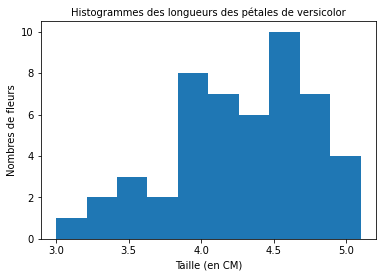

In [144]:
data_by_cat = [(f[2], i) for i in range(cat_names.size) for f in iris.data[iris.target == i]]

versi_petal = [d[0] for d in data_by_cat if d[1] == 1]

plt.ylabel('Nombres de fleurs')
plt.xlabel('Taille (en CM)')

plt.hist(versi_petal)

plt.title('Histogrammes des longueurs des pétales de versicolor', fontsize=10)

plt.show()

6. Faites l'histogramme des longueurs des pétales des setosas.

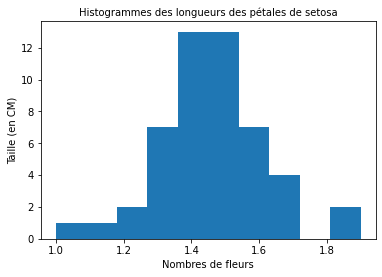

In [143]:
data_by_cat = [(f[2], i) for i in range(cat_names.size) for f in iris.data[iris.target == i]]

versi_petal = [d[0] for d in data_by_cat if d[1] == 0]

plt.ylabel('Nombres de fleurs')
plt.xlabel('Taille (en CM)')

plt.hist(versi_petal)

plt.title('Histogrammes des longueurs des pétales de setosa', fontsize=10)

plt.show()

7. Faites l'histogramme des longueurs des pétales des virginica.

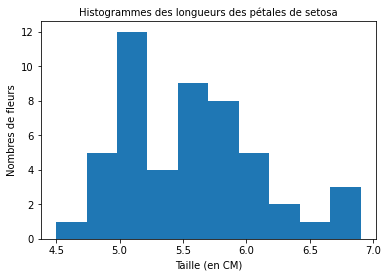

In [145]:
data_by_cat = [(f[2], i) for i in range(cat_names.size) for f in iris.data[iris.target == i]]

versi_petal = [d[0] for d in data_by_cat if d[1] == 2]

plt.ylabel('Nombres de fleurs')
plt.xlabel('Taille (en CM)')

plt.hist(versi_petal)

plt.title('Histogrammes des longueurs des pétales de setosa', fontsize=10)

plt.show()


## Partie 2 - Bernoulli

1. Créez une fonction de Bernoulli, elle a deux issues possibles : 1 ou 0. Passez en paramètre la probablité p d'obternir 1 à cette fonction.

In [155]:
def bernoulli(p=0.5):
    return np.random.binomial(1, p)

for i in range(5):
    print(bernoulli())

1
1
1
0
0


- Problématique :

Si on prend l'expérience suivante : on lance successivement 10 fois une pièce de monnaie parfaitement équilibrée. Quelle est la probabilité d'obtenir 3 piles sur ces 10 lancers ?

2. Créez une fonction **experience(n,p)** qui permet de simuler un lancer de dé à l'aide de la fonction bernoulli.

In [180]:
def experience(n,p=0.5):
    return [bernoulli(p) for i in range(n)]

experience(10)

[1, 0, 0, 1, 0, 0, 1, 1, 0, 1]

3. Répétez un grand nombre de fois l'expérience décrite ci-dessus et comptez alors le nombre de fois que l'on obtient une combinaison de 3 piles parmi 10 lancers :

In [193]:
nb_of_try = 100
nb = 10

dataset = np.array([experience(nb) for i in range(nb_of_try)])
res = ((dataset == 1).sum(1) == 3).sum()
res2 = ((dataset == 1).sum(1) > 3).sum()

(f"Sur {nb_of_try} sessions de {nb} lancers, nous avons obtenu une combinaisons de 3 piles à {res} reprises, nous avons obtenu une combinaison supérieure à 3 piles à {res2} reprises")

'Sur 100 sessions de 10 lancers, nous avons obtenu une combinaisons de 3 piles à 10 reprises, nous avons obtenu une combinaison supérieure à 3 piles à 84 reprises'